In [1]:
# 掛載 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 導入所需庫
import pandas as pd

# 指定 Google Drive 中資料夾的路徑
data_path = '/content/drive/MyDrive/Flightdelays/'  # 修改為你的資料夾路徑

# 讀取數據
train_data = pd.read_csv(data_path + 'flight_delays_train.csv')
test_data = pd.read_csv(data_path + 'flight_delays_test.csv')

# 確認數據讀取成功
print("訓練集：")
print(train_data.head())

print("\n測試集：")
print(test_data.head())


Mounted at /content/drive
訓練集：
  Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0   c-8       c-21       c-7     1934            AA    ATL  DFW       732   
1   c-4       c-20       c-3     1548            US    PIT  MCO       834   
2   c-9        c-2       c-5     1422            XE    RDU  CLE       416   
3  c-11       c-25       c-6     1015            OO    DEN  MEM       872   
4  c-10        c-7       c-6     1828            WN    MDW  OMA       423   

  dep_delayed_15min  
0                 N  
1                 N  
2                 N  
3                 N  
4                 Y  

測試集：
  Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance
0   c-7       c-25       c-3      615            YV    MRY  PHX       598
1   c-4       c-17       c-2      739            WN    LAS  HOU      1235
2  c-12        c-2       c-7      651            MQ    GSP  ORD       577
3   c-3       c-25       c-7     1614            WN    BWI  MHT       37

In [ ]:
# 檢查訓練集資料的筆數和每個特徵的數據類型
print(f"訓練集總筆數: {len(train_data)}\n")

# 查看特徵名稱及其數據類型
print("特徵數據類型:")
print(train_data.dtypes)


訓練集總筆數: 100000

特徵數據類型:
Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min    object
dtype: object


In [ ]:
# 檢查缺失值
missing_values = train_data.isnull().sum()

print("每列缺失值數量：")
print(missing_values)


每列缺失值數量：
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64


In [ ]:
# 數值型特徵用中位數填充
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].median())

# 類別型特徵用眾數填充
categorical_cols = train_data.select_dtypes(include=['object']).columns
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])

print("缺失值處理完成！")

缺失值處理完成！


In [ ]:
from sklearn.model_selection import train_test_split

# 假設目標變數是 'dep_delayed_15min'
X = train_data.drop('dep_delayed_15min', axis=1)  # 特徵
y = train_data['dep_delayed_15min']  # 目標變數

# 使用 one-hot encoding 將類別型變數轉換為數值型
X = pd.get_dummies(X)

# 分割數據集 (70% 訓練集, 30% 測試集)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 確認分割後的數據大小
print(f"訓練集大小: {X_train.shape[0]} 筆")
print(f"測試集大小: {X_test.shape[0]} 筆")


訓練集大小: 70000 筆
測試集大小: 30000 筆


In [ ]:
from sklearn.preprocessing import StandardScaler

# 假設 X 是數據的特徵集
# 進行 one-hot 編碼以處理類別型特徵
X = pd.get_dummies(train_data.drop('dep_delayed_15min', axis=1))

# 初始化標準化對象
scaler = StandardScaler()

# 對數據進行標準化
X_scaled = scaler.fit_transform(X)

# 將標準化後的數據轉回 DataFrame（可選）
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 查看結果
print("標準化後的數據（前五行）：")
print(X_scaled.head())


標準化後的數據（前五行）：
    DepTime  Distance  Month_c-1  Month_c-10  Month_c-11  Month_c-12  \
0  1.243715  0.004530  -0.296384   -0.302924   -0.298435   -0.300161   
1  0.433431  0.182040  -0.296384   -0.302924   -0.298435   -0.300161   
2  0.168934 -0.545405  -0.296384   -0.302924   -0.298435   -0.300161   
3 -0.685433  0.248172  -0.296384   -0.302924    3.350810   -0.300161   
4  1.021202 -0.533223  -0.296384    3.301163   -0.298435   -0.300161   

   Month_c-2  Month_c-3  Month_c-4  Month_c-5  ...  Dest_TYS  Dest_VCT  \
0  -0.283061  -0.306646  -0.302983  -0.305631  ...  -0.04363 -0.003162   
1  -0.283061  -0.306646   3.300520  -0.305631  ...  -0.04363 -0.003162   
2  -0.283061  -0.306646  -0.302983  -0.305631  ...  -0.04363 -0.003162   
3  -0.283061  -0.306646  -0.302983  -0.305631  ...  -0.04363 -0.003162   
4  -0.283061  -0.306646  -0.302983  -0.305631  ...  -0.04363 -0.003162   

   Dest_VIS  Dest_VLD  Dest_VPS  Dest_WRG  Dest_WYS  Dest_XNA  Dest_YAK  \
0 -0.008367  -0.01304  -0.03148 -

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Convert 'Y' and 'N' in y_train to 1 and 0 respectively
y_train = y_train.map({'Y': 1, 'N': 0})
y_test = y_test.map({'Y': 1, 'N': 0})

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# 預測
y_pred = lr_model.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.1420
R2 Score: 0.0809


#結果解釋
Mean Squared Error (MSE):

MSE 表示預測值與實際值之間差距的平方平均值。
值為 0.1420，表明模型的預測與實際值之間存在一定的誤差。
R² Score:

R² 表示模型解釋目標變數變異的比例，範圍為 [0, 1]。
值為 0.0809，表示模型只能解釋 8.09% 的目標變異性，這表明模型對於目標變數的解釋能力較弱。

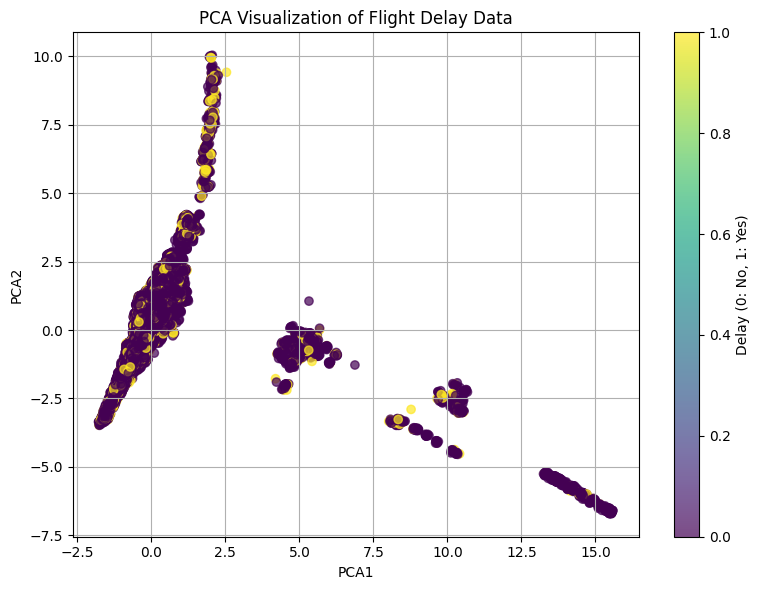

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 將目標變數轉換為數字
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 對特徵進行 one-hot 編碼
X = pd.get_dummies(train_data.drop('dep_delayed_15min', axis=1))

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初始化 PCA，降維到 2 個主成分以便視覺化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 將結果轉為 DataFrame 以便繪圖
pca_data = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_data['Target'] = y.values

# 繪製 PCA 的視覺化圖
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_data['PCA1'], pca_data['PCA2'], c=pca_data['Target'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Delay (0: No, 1: Yes)')
plt.title('PCA Visualization of Flight Delay Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Assuming train_data is already loaded and preprocessed
# If not, make sure you have the necessary code to load and preprocess the data
# 掛載 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 導入所需庫
import pandas as pd

# 指定 Google Drive 中資料夾的路徑
data_path = '/content/drive/MyDrive/Flightdelays/'  # 修改為你的資料夾路徑

# 讀取數據
train_data = pd.read_csv(data_path + 'flight_delays_train.csv')
test_data = pd.read_csv(data_path + 'flight_delays_test.csv')

# 將目標變數轉換為數字
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 對特徵進行 one-hot 編碼
X = pd.get_dummies(train_data.drop('dep_delayed_15min', axis=1))

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Calculate X_scaled here

# 初始化 Kernel PCA，使用 RBF kernel 並降維到 2 個主成分以便視覺化
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_scaled)

# 將結果轉為 DataFrame 以便繪圖
kpca_data = pd.DataFrame(X_kpca, columns=['KPCA1', 'KPCA2'])
kpca_data['Target'] = y.values

# 繪製 Kernel PCA 的視覺化圖
plt.figure(figsize=(8, 6))
scatter = plt.scatter(kpca_data['KPCA1'], kpca_data['KPCA2'], c=kpca_data['Target'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Delay (0: No, 1: Yes)')
plt.title('Kernel PCA Visualization of Flight Delay Data')
plt.xlabel('KPCA1')
plt.ylabel('KPCA2')
plt.grid(True)
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


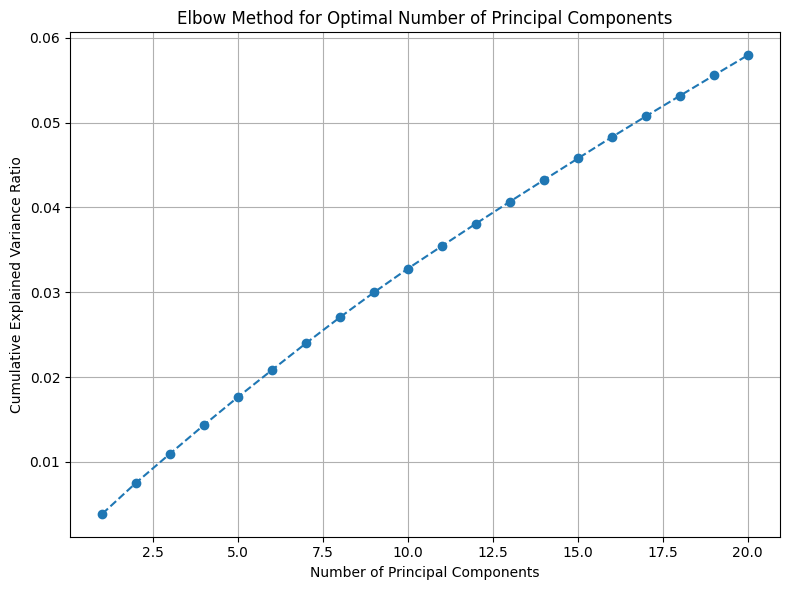

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 將目標變數轉換為數字
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 對特徵進行 one-hot 編碼
X = pd.get_dummies(train_data.drop('dep_delayed_15min', axis=1))

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 手肘法計算最佳主成分數量
explained_variances = []
components_range = range(1, 21)  # 測試 1 到 20 個主成分

for n in components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(sum(pca.explained_variance_ratio_))

# 繪製手肘圖
plt.figure(figsize=(8, 6))
plt.plot(components_range, explained_variances, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Assuming your target variable is named 'dep_delayed_15min'
X = train_data.drop('dep_delayed_15min', axis=1)  # Features
y = train_data['dep_delayed_15min']  # Target variable

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
top_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance in descending order and select top 3 features
top_features = top_features.sort_values(by='Importance', ascending=False).head(3)

# Now you can proceed with your visualization code
# ... (rest of your code for plotting) ...

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 假設你已經有 train_data 的 DataFrame，重新載入資料
train_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_train.csv'  # 修改為實際路徑
train_data = pd.read_csv(train_data_path)

# 將目標變數轉為數字
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 特徵工程：對特徵進行 one-hot 編碼並標準化
X = pd.get_dummies(train_data.drop('dep_delayed_15min', axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據集為 70% 訓練集和 30% 測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 初始化邏輯斯迴歸模型
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# 訓練模型
log_reg_model.fit(X_train, y_train)

# 預測測試集
y_pred = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]  # 概率分數

# 評估模型表現
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8118
ROC AUC Score: 0.7077

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89     24269
           1       0.57      0.06      0.11      5731

    accuracy                           0.81     30000
   macro avg       0.69      0.53      0.50     30000
weighted avg       0.77      0.81      0.75     30000



#邏輯斯迴歸模型ccuracy（準確率）：0.8118

準確率是正確分類的樣本數佔總樣本數的比例。模型在測試集中的總體準確率為 81.18%，表示模型對整體樣本的分類效果還不錯。
但由於類別不平衡問題（延誤樣本相對較少），準確率可能高估了模型的性能。
ROC AUC Score（ROC 曲線下面積）：0.7077

ROC AUC 衡量模型區分正負樣本的能力。
0.7077 表明模型對延誤樣本的區分能力尚可（完全隨機猜測的 AUC 為 0.5，理想模型的 AUC 為 1.0）。
AUC 值優於隨機模型，但仍有改進空間。
Classification Report（分類報告）

Precision（精確率）: 真正例佔所有預測為正例的比例。
對於未延誤（類別 0），精確率為 0.82。
對於延誤（類別 1），精確率為 0.57，表示模型對延誤樣本的判斷有相對較多的誤報。
Recall（召回率）: 真正例佔所有實際為正例的比例。
對於未延誤（類別 0），召回率為 0.99，模型對未延誤樣本幾乎能完全正確識別。
對於延誤（類別 1），召回率為 0.06，表示大部分延誤樣本被錯分為未延誤。
F1-Score: 精確率與召回率的加權平均。
類別 1 的 F1 分數為 0.11，顯示模型對延誤樣本的表現較差。
Support: 每個類別的樣本數量。
未延誤樣本有 24269 筆，延誤樣本只有 5731 筆。
Macro Avg（宏平均）

不考慮類別不平衡，對每個類別的指標取平均。
反映了模型在所有類別上的整體性能，對小樣本類別更敏感。
Weighted Avg（加權平均）

根據每個類別的樣本數進行加權平均。
更能代表模型在不平衡數據集上的整體表現。

<ipython-input-4-3275f5210574>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')


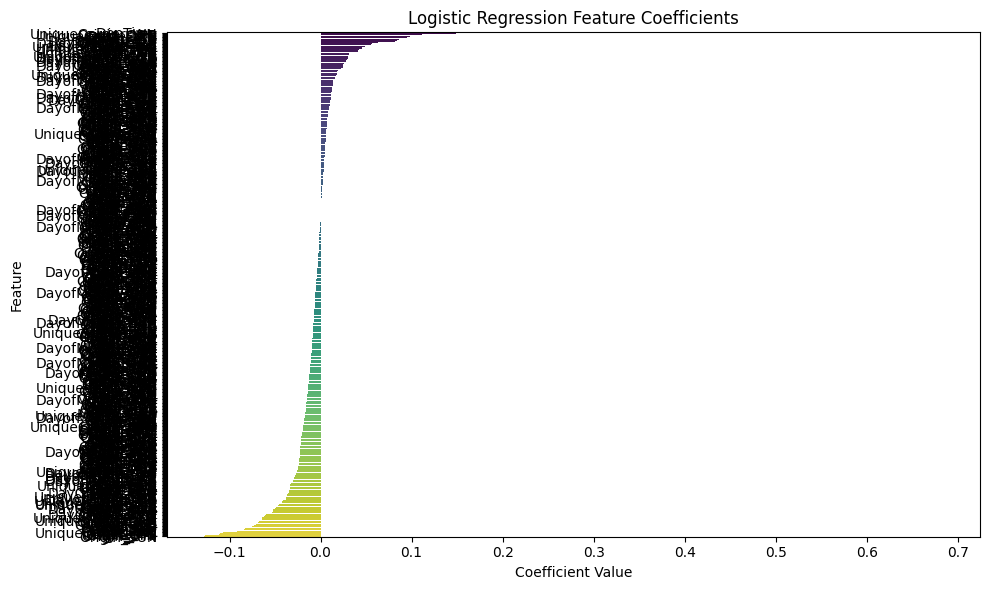

In [4]:
# 重新導入必要的庫
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經有 train_data 的 DataFrame
train_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_train.csv'  # 修改為實際路徑
train_data = pd.read_csv(train_data_path)

# 目標變數處理
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 特徵處理
X = pd.get_dummies(train_data.drop('dep_delayed_15min', axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 訓練邏輯斯迴歸模型
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

# 獲取特徵係數
coefficients = log_reg_model.coef_[0]
feature_names = X.columns

# 可視化邏輯斯迴歸的特徵係數
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 繪製條形圖
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8220
ROC AUC Score: 0.7411

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     24269
           1       0.67      0.14      0.23      5731

    accuracy                           0.82     30000
   macro avg       0.75      0.56      0.56     30000
weighted avg       0.80      0.82      0.77     30000



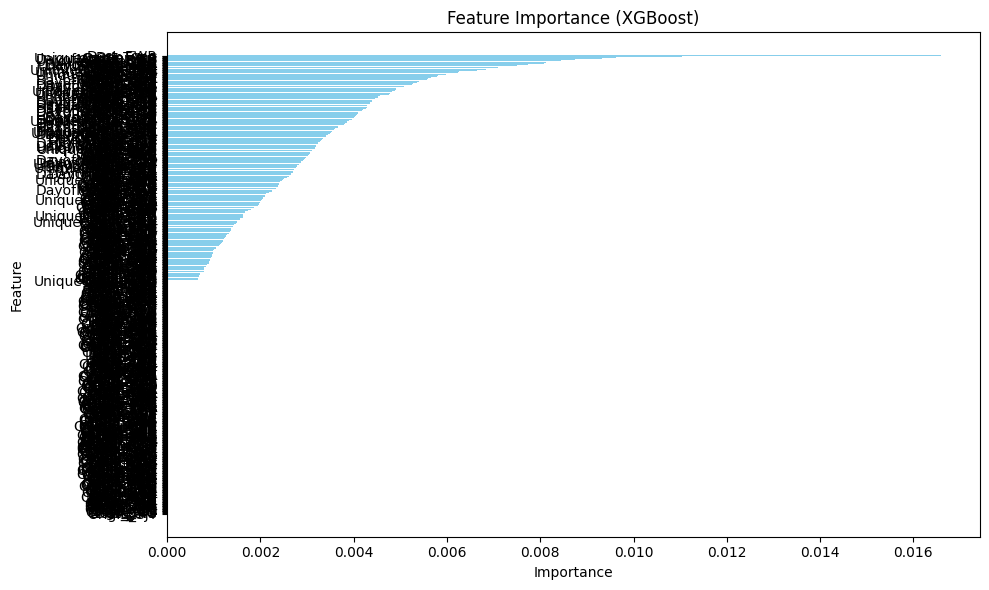

In [5]:
# 載入必要的庫
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# 重新載入數據
train_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_train.csv'  # 修改為實際路徑
train_data = pd.read_csv(train_data_path)

# 處理目標變數
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 處理特徵
X = pd.get_dummies(train_data.drop('dep_delayed_15min', axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 初始化 XGBoost 模型
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 訓練模型
xgb_model.fit(X_train, y_train)

# 預測測試集
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # 概率分數

# 模型評估
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 特徵重要性可視化
feature_importances = xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 繪製特徵重要性條形圖
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
#XGBoost

Accuracy: 0.8134
ROC AUC Score: 0.6962

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     24269
           1       0.59      0.08      0.13      5731

    accuracy                           0.81     30000
   macro avg       0.71      0.53      0.51     30000
weighted avg       0.78      0.81      0.75     30000



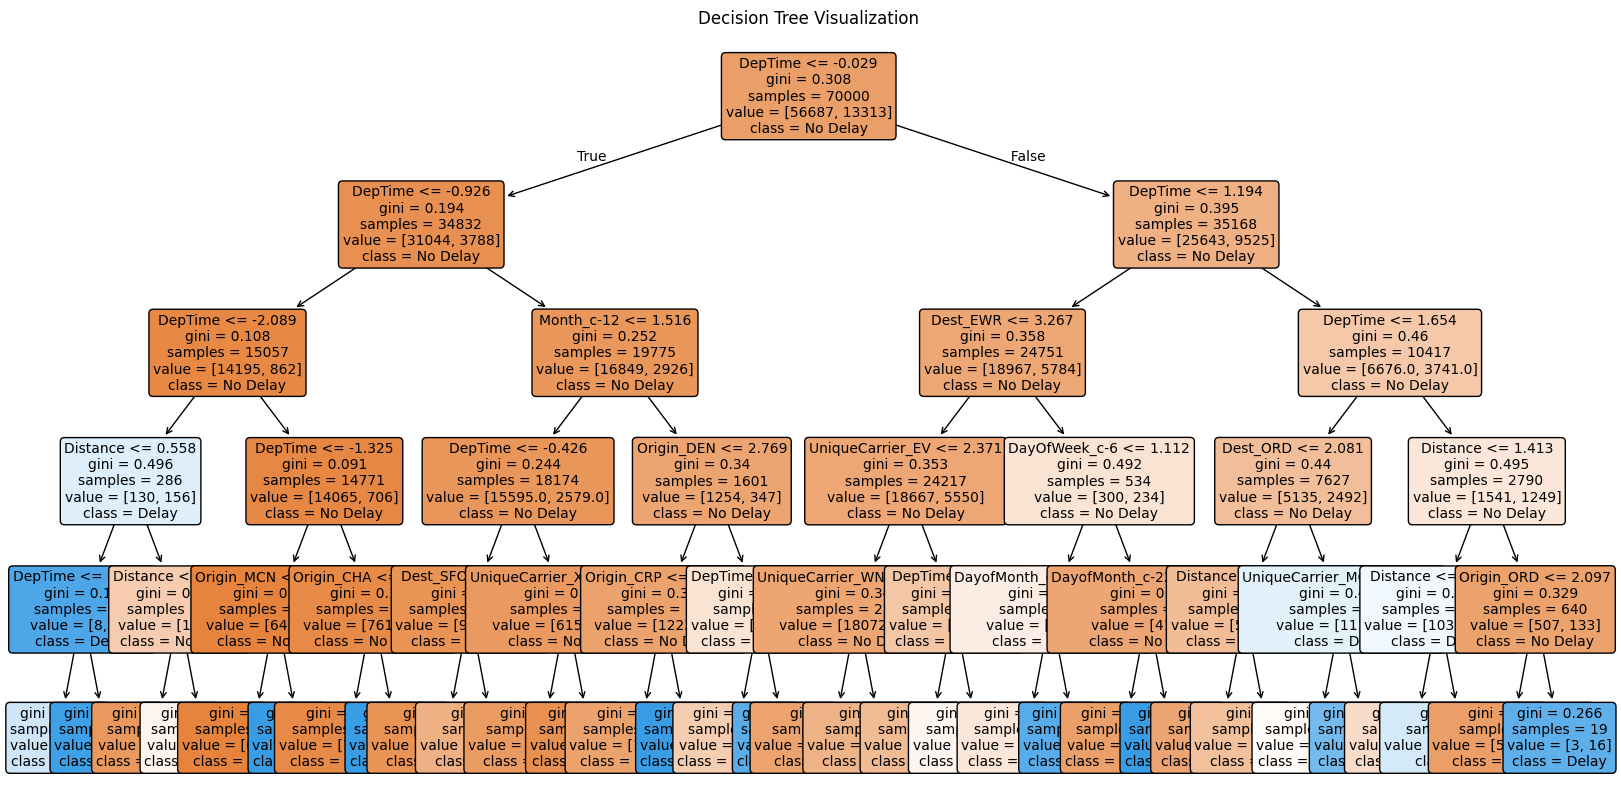

In [6]:
# 導入必要的庫
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree

# 重新載入數據
train_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_train.csv'  # 修改為實際路徑
train_data = pd.read_csv(train_data_path)

# 處理目標變數
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 處理特徵
X = pd.get_dummies(train_data.drop('dep_delayed_15min', axis=1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 初始化決策樹模型
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# 訓練模型
dt_model.fit(X_train, y_train)

# 預測測試集
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# 模型評估
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 視覺化決策樹
plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Delay', 'Delay'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()


In [10]:
# 載入必要的庫
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 重新載入訓練集和測試集
train_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_train.csv'  # 修改為實際路徑
test_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_test.csv'  # 修改為實際路徑
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# 處理目標變數
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 僅保留 DepTime 特徵
X_train_dep = train_data[['DepTime']]
X_test_dep = test_data[['DepTime']]

# 分割數據集
X_train, X_val, y_train, y_val = train_test_split(X_train_dep, y, test_size=0.3, random_state=42)

# 訓練決策樹模型
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# 預測測試集
test_predictions = dt_model.predict(X_test_dep)

# 生成 Kaggle 提交格式的 CSV 文件
submission = pd.DataFrame({'id': test_data.index, 'dep_delayed_15min': test_predictions})
submission_file_path = '/content/drive/MyDrive/Flightdelays/submission.csv'
submission.to_csv(submission_file_path, index=False)

print(f"提交檔案已生成，存儲在 {submission_file_path}")


提交檔案已生成，存儲在 /content/drive/MyDrive/Flightdelays/submission.csv


#用xgboots

In [13]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# 1. 讀取數據
train_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_train.csv'
test_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_test.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# 2. 處理目標變數
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 3. 合併數據以處理類別型特徵
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# 4. 特徵選擇
features = ['DepTime', 'Month', 'DayOfWeek', 'Distance', 'UniqueCarrier']
X_combined = combined_data[features]

# 對類別型特徵進行編碼
for col in ['Month', 'DayOfWeek', 'UniqueCarrier']:
    X_combined[col] = X_combined[col].astype(str).astype('category').cat.codes

# 拆分回訓練集和測試集
X_train_full = X_combined.iloc[:len(train_data)]
X_test_full = X_combined.iloc[len(train_data):]

# 5. 分割數據集
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y, test_size=0.3, random_state=42)

# 6. 訓練 XGBoost 模型
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=10)
xgb_model.fit(X_train, y_train)

# 7. 預測測試集
test_predictions = xgb_model.predict(X_test_full)

# 8. 生成 Kaggle 提交格式的 CSV 文件
submission = pd.DataFrame({'id': test_data.index, 'dep_delayed_15min': test_predictions})
submission_file_path = '/content/drive/MyDrive/Flightdelays/submission_xgb_fixed.csv'
submission.to_csv(submission_file_path, index=False)

print(f"提交檔案已生成，存儲在 {submission_file_path}")


<ipython-input-13-5b7302eeefa0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_combined[col] = X_combined[col].astype(str).astype('category').cat.codes
<ipython-input-13-5b7302eeefa0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_combined[col] = X_combined[col].astype(str).astype('category').cat.codes
<ipython-input-13-5b7302eeefa0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

提交檔案已生成，存儲在 /content/drive/MyDrive/Flightdelays/submission_xgb_fixed.csv


#調參數

In [18]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. 讀取數據
train_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_train.csv'
test_data_path = '/content/drive/MyDrive/Flightdelays/flight_delays_test.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# 2. 處理目標變數
y = (train_data['dep_delayed_15min'] == 'Y').astype(int)

# 3. 特徵工程
def create_features(data):
    data['DepHour'] = data['DepTime'] // 100  # 提取出發小時
    data['IsMorning'] = (data['DepHour'] < 12).astype(int)
    data['IsAfternoon'] = ((data['DepHour'] >= 12) & (data['DepHour'] < 18)).astype(int)
    data['IsEvening'] = (data['DepHour'] >= 18).astype(int)
    data = data[['DepTime', 'DepHour', 'IsMorning', 'IsAfternoon', 'IsEvening', 'Month', 'DayOfWeek', 'Distance', 'UniqueCarrier']]
    return data

X_train_full = create_features(train_data)
X_test_full = create_features(test_data)

# 類別型特徵編碼
for col in ['Month', 'DayOfWeek', 'UniqueCarrier']:
    X_train_full[col] = X_train_full[col].astype(str).astype('category').cat.codes
    X_test_full[col] = X_test_full[col].astype(str).astype('category').cat.codes

# 4. 分割數據集
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y, test_size=0.3, random_state=42)

# 5. 處理類別不平衡（使用 SMOTE）
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 6. 訓練 XGBoost 模型
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# 7. 預測測試集
test_predictions = xgb_model.predict(X_test_full)

# 8. 生成 Kaggle 提交格式的 CSV 文件
submission = pd.DataFrame({'id': test_data.index, 'dep_delayed_15min': test_predictions})
submission_file_path = '/content/drive/MyDrive/Flightdelays/submission_xgb_fixed.csv'
submission.to_csv(submission_file_path, index=False)

print(f"提交檔案已生成，存儲在 {submission_file_path}")


<ipython-input-18-faa5cc1f1582>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_full[col] = X_train_full[col].astype(str).astype('category').cat.codes
<ipython-input-18-faa5cc1f1582>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_full[col] = X_test_full[col].astype(str).astype('category').cat.codes
<ipython-input-18-faa5cc1f1582>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

提交檔案已生成，存儲在 /content/drive/MyDrive/Flightdelays/submission_xgb_fixed.csv
